# Cloud
- ***Click the button on the right to download***

In [1]:
# pip install -U quarkstudio # python>=3.10
from quark import Task

In [4]:
# apply a token from quafu_ts@baqis.ac.cn
token = 'Vfx:uBehSiP8xWjpH2SZ86QXDpo{URStWZsUdspwvgt/:KkN2lkO6dkMyJEP5R{N4J{OypkJxiY[jxjJyBkP4BkP6FEJ4JUM5BUM1JENzJjPjRYZqKDMj53ZvNXZvNYbyGnZBWo[iWYdjpkJzW3d2Kzf'

In [5]:
# initialize a task manager
tmgr = Task(token)

In [6]:
# check the running status of all the backends
tmgr.status()

{'Dongling': 0,
 'Miaofeng': 'Maintenance',
 'Baihua': 0,
 'Yunmeng': 'Maintenance',
 'Haituo': 'Maintenance'}

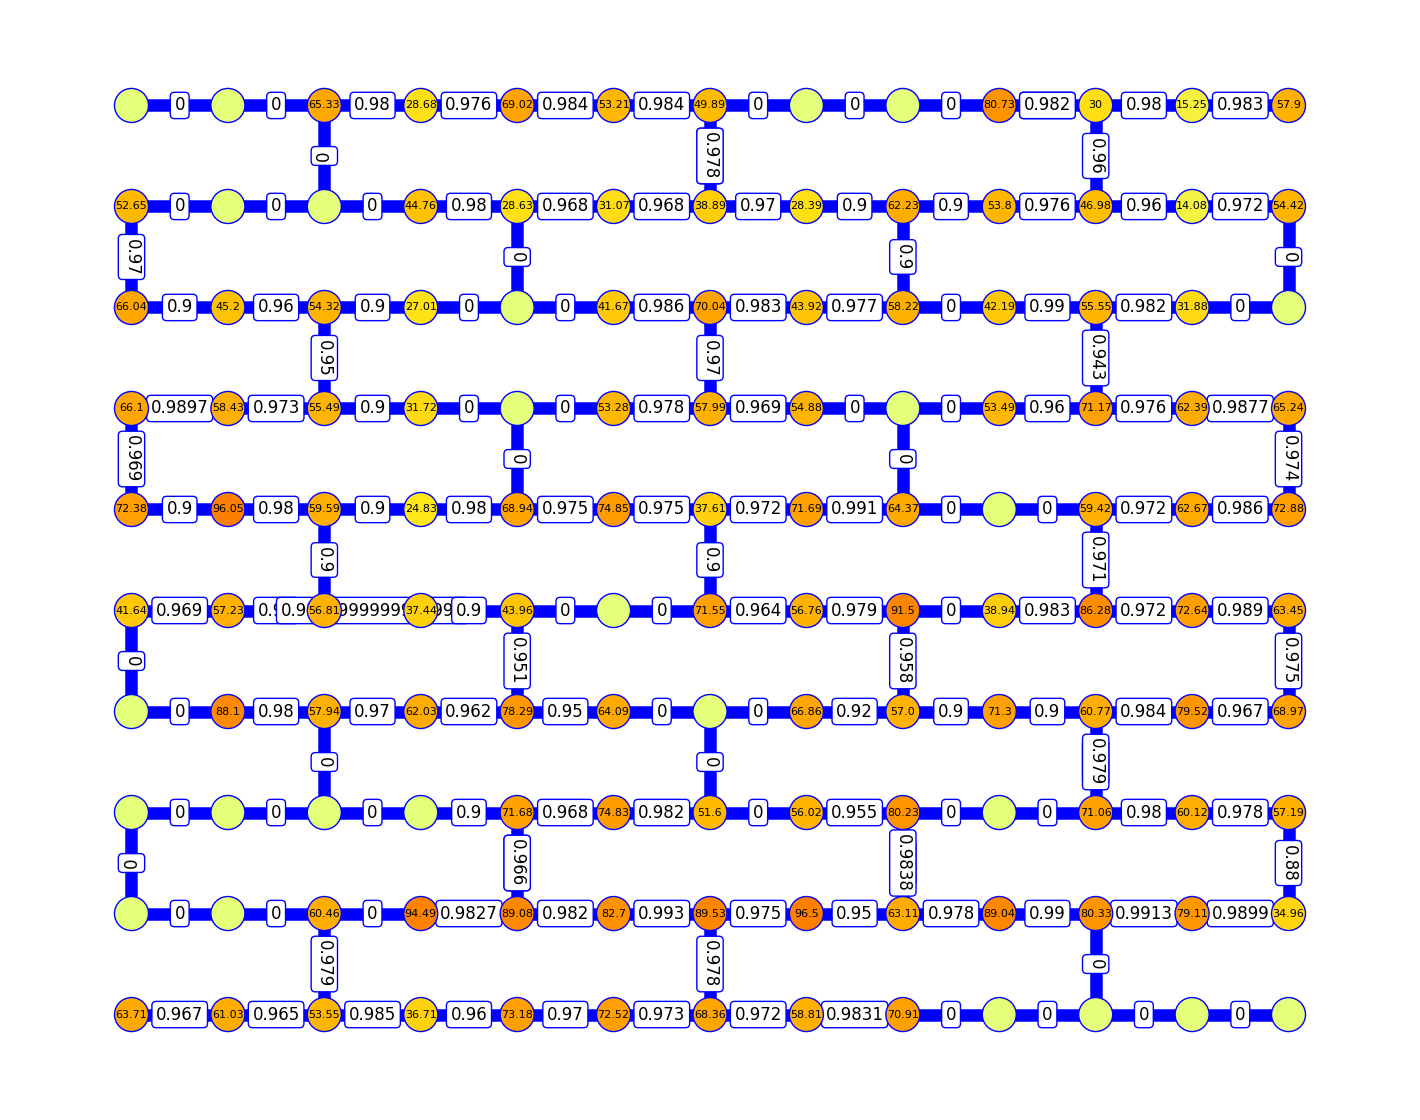

In [7]:
# chip info will be synchronized with server if refresh is True
info = tmgr.backend('Dongling', 'T1', refresh=False)

In [9]:
# write a quantum circuit
qasm="""
OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg meas[8];
h q[2];
cx q[2],q[3];
cx q[3],q[4];
cx q[4],q[5];
measure q[2] -> meas[0];
measure q[3] -> meas[1];
measure q[4] -> meas[2];
measure q[5] -> meas[3];
"""

In [10]:
# run the task
task = {'chip': 'Baihua',  # chip name
        'name': 'MyQuantumnTask',  # task name
        'circuit':qasm, # qasm
        'compile':True,
        'token':token
        }
tid = tmgr.run(task)

In [11]:
tmgr.status(2406302101072575708) # tid = 2406302101072575708

'Finished'

In [12]:
# retrieve the result
tmgr.result(2406302101072575708)

{'count': {'1111': 387,
  '1011': 46,
  '0011': 24,
  '1000': 24,
  '0000': 433,
  '1110': 22,
  '0001': 20,
  '1101': 9,
  '0100': 10,
  '0111': 22,
  '0010': 4,
  '1100': 16,
  '1001': 3,
  '0101': 2,
  '1010': 2},
 'corrected': {},
 'transpiled': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[143];\ncreg c[4];\nh q[57];\ncx q[57],q[58];\ncx q[58],q[59];\ncx q[59],q[60];\nbarrier q[57],q[58],q[59],q[60];\nmeasure q[57] -> c[0];\nmeasure q[58] -> c[1];\nmeasure q[59] -> c[2];\nmeasure q[60] -> c[3];\n',
 'qlisp': "[('H', 'Q57'),\n('Cnot', ('Q57', 'Q58')),\n('Cnot', ('Q58', 'Q59')),\n('Cnot', ('Q59', 'Q60')),\n('Barrier', ('Q57', 'Q58', 'Q59', 'Q60')),\n(('Measure', 0), 'Q57'),\n(('Measure', 1), 'Q58'),\n(('Measure', 2), 'Q59'),\n(('Measure', 3), 'Q60')]",
 'tid': 2406302101072575708,
 'error': '',
 'status': 'Finished',
 'finished': '2024-06-30-21-01-10'}

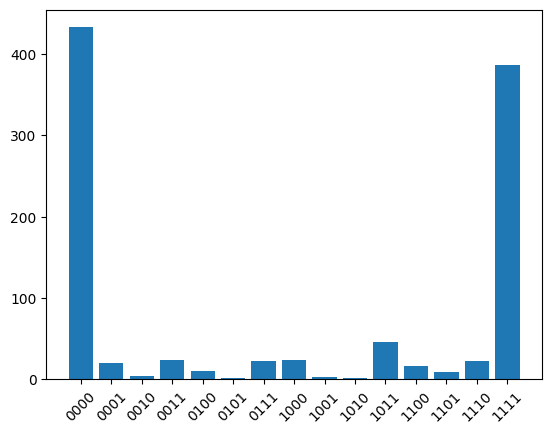

In [13]:
# visualize the results
import matplotlib.pyplot as plt
res = tmgr.result(2406302101072575708)
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
ticks = plt.xticks(rotation=45)